# 메모장
1. 은하는 2개만 설정(각 은하는 우리 은하와 안드로메다 은하의 물리량을 따름)
-우리 은하 물리량
반지름: 52,850광년, 질량: 5.8×10**11 
중심 블랙홀: 궁수자리 A*, 블랙홀 질량:4.7*10**6, 블랙홀 반지름: 0.0000023254 광년
-andromeda(안드로메다) 물리량
반지름:110,000광년 질량: 1.5×10**12 
2. 2개의 은하는 비록 물리량은 우리 은하와 안드로메다 은하를 따르지만, 모양은 타원 or 공 모양 --> 공 모양이 좋을 듯
3. 새로운 변수 추가 --> 은하 간의 거리, 은하 중심의 블랙홀
4. 블랙홀 외 다른 별들은 플라즈마 상태의 수소의 밀도를 따른다

# 기본적인 상수 설정
시간= 년 , 질량= 태양질량, 거리 단위: 천문단위

In [1]:
#기본적인 상수 설정
light_year= 63241.1077084266 #광년을 au로 바꿔주는 역활
g=4.47E-22
dt= float(input("시간 변화량을 정하세요")) #시간 변화량
time_over=float(input("종료 시간을 정하세요(단위:년)"))
# 그래프 함수 불러옴
import matplotlib.pyplot as plt
import random as rand
import math as math #여러 수학 기호들을 사용할 수 있게 해줌.
pi= math.pi


시간 변화량을 정하세요1
종료 시간을 정하세요(단위:년)100


# 거리 공식 설정

In [2]:
"""질점에서부터 거리 구하기(함수 정의)"""
def sqrt(num0): # 근호 역활
    result0=(num0)**0.5
    return result0

def dbp(num1,num2,num3,num4,num5,num6): #두 점 사이 거리 공식 매개변수 6개
    #num1~2까지는 x값, num3~4까지는 y값 num5~6은 z값
    result1= sqrt(((num1-num2)**2)+((num3-num4)**2)+((num5-num6)**2))
    return result1

"""지표면에서부터 거리 구하기(함수 정의)"""
def dbp1(D1,D2,D3,D4,D5,D6,D7,D8): #D1~D6는 두 점 사이 거리 공식과 동일, D5,D6는 두 물체 각각의 반지름
    dbp1_result=dbp(D1,D2,D3,D4,D5,D6)-abs(D7+D8) #D7~D8는 물체의 반지름
    return dbp1_result #같은 물체끼리 dbp1을 했을 때 dbp1이 0이 되지 않는다.

In [3]:
def volume(num1):
    volume_result=(4/3)*pi*(num1)**3
    return volume_result

# 은하 관련 기초 자료

In [4]:
"""우리 은하 기초 자료"""
our_galaxy_radius= 52850*light_year
our_galaxy_mass=5.8*(10**11)
our_galaxy_v=volume(our_galaxy_radius)
our_galaxy_density= our_galaxy_mass/our_galaxy_v
our_galaxy_count=int(input("우리 은하 내 별의 수를 정하세요:"))

# 우리 은하 중심 블랙홀 기초 자료
our_blackhole_mass= 4.7*(10**6)
our_blackhole_radius= 0.0000023254*light_year

our_galaxy_starmass=our_galaxy_mass-our_blackhole_mass

"""안드로매다 은하 기초 자료"""
andromeda_mass=1.5*(10**12)
andromeda_radius=110000*light_year
andromeda_v=(4/3)*pi*(andromeda_radius)**3
andromeda_density= andromeda_mass/andromeda_v
andromeda_count=int(input("안드로메다 내 별의 수를 정하세요"))

# 안드로메다 은하 중심 블랙홀 기초 자료
andromeda_blackhole_mass=2.3 *(10**8) 
andromeda_blackhole_radius= 0.0000023254*light_year #임의로 우리 은하 블랙홀 반지름과 같게 함

andromeda_starmass=andromeda_mass-andromeda_blackhole_mass

andromeda_core_locationx=float(input('안드로메다 중심 위치x를 정하세요'))
andromeda_core_locationy=float(input('안드로메다 중심 위치y를 정하세요'))
andromeda_core_locationz=float(input('안드로메다 중심 위치z를 정하세요'))

#우리 은하와 안드로메다까지 거리
our_andromeda_distance=dbp(0,0,0,andromeda_core_locationx,andromeda_core_locationy, andromeda_core_locationz )
print(our_andromeda_distance)
"""플라즈마 상태의 수소의 밀도"""
sun_mass=1.989*(10**33) #g으로 나타냄
au= 149597870700 #미터로 나타냄
hydrogen_density=(au**3)*100*1.41/sun_mass #태양의 평균 밀도로 설정


"""우리 은하와 안드로메다 축소 크기 설정"""
area_radius=float(input("우리 은하의 반지름을 설정하세요."))
galaxy_radius_times=andromeda_radius/our_galaxy_radius

우리 은하 내 별의 수를 정하세요:100
안드로메다 내 별의 수를 정하세요100
안드로메다 중심 위치x를 정하세요1000
안드로메다 중심 위치y를 정하세요0
안드로메다 중심 위치z를 정하세요0
1000.0
우리 은하의 반지름을 설정하세요.50


# 축소비

In [5]:
reduction_constant= area_radius/our_galaxy_radius
print('축소비', reduction_constant)

축소비 1.4959791629801778e-08


# 물체의 질량,속도(x,y), 크기 정의

In [6]:

REPEAT=int(time_over/dt) #계산 반복할 횟수
"""은하 전체의 속도"""
#우리 은하의 속도 값
our_galaxy_Vxvalue= int(input('우리 은하의 속도x을 정해세요:'))
our_galaxy_Vyvalue= int(input('우리 은하의 속도y을 정해세요:'))
our_galaxy_Vzvalue= int(input('우리 은하의 속도z을 정해세요:'))
#안드로 메다 은하의 속도 값
andromeda_Vxvalue= int(input('안드로메다 은하의 속도x을 정해세요:'))
andromeda_Vyvalue= int(input('안드로메다 은하의 속도y을 정해세요:'))
andromeda_Vzvalue= int(input('안드로메다 은하의 속도z을 정해세요:'))

count= our_galaxy_count+andromeda_count #물체의 개수 정함
print('총 물체의 개수',count)

"""별들의 질량 값 설정"""
our_galaxy_massvalue= our_galaxy_starmass/our_galaxy_count
andromeda_massvalue= andromeda_starmass/andromeda_count

"""for문을 우리 은하와 안드로메다은하로 쪼개야 한다"""
for a in range(1,our_galaxy_count+1):
    if a==1:
        globals()['mass1']= our_blackhole_mass
        #물체들의 질량 설정 완료
        globals()['vx{}'.format(a)]= our_galaxy_Vxvalue # 중심 블랙홀도 은하 전체의 속도를 따른다.
        #물체들의 속도x 설정 완료
        globals()['vy{}'.format(a)]= our_galaxy_Vyvalue
        #물체들의 속도y 설정 완료
        globals()['vz{}'.format(a)]= our_galaxy_Vzvalue
        #물체들의 속도z 설정 완료
        continue
        
    globals()['mass{}'.format(a)]= our_galaxy_massvalue
    #물체들의 질량 설정 완료
    globals()['vx{}'.format(a)]= our_galaxy_Vxvalue
    #물체들의 속도x 설정 완료
    globals()['vy{}'.format(a)]= our_galaxy_Vyvalue
    #물체들의 속도y 설정 완료
    globals()['vz{}'.format(a)]= our_galaxy_Vzvalue
    #물체들의 속도z 설정 완료

"""안드로메다 은하"""
for a in range(our_galaxy_count+1,count+1):
    if a==our_galaxy_count+1:#안드로메다 은하 중심 블랙홀
        globals()['mass{}'.format(a)]= andromeda_blackhole_mass
        #물체들의 질량 설정 완료
        globals()['vx{}'.format(a)]= andromeda_Vxvalue
        #물체들의 속도x 설정 완료
        globals()['vy{}'.format(a)]= andromeda_Vyvalue
        #물체들의 속도y 설정 완료
        globals()['vz{}'.format(a)]= andromeda_Vzvalue
        #물체들의 속도z 설정 완료 
        continue
        
    globals()['mass{}'.format(a)]= andromeda_massvalue
    #물체들의 질량 설정 완료
    globals()['vx{}'.format(a)]= andromeda_Vxvalue
    #물체들의 속도x 설정 완료
    globals()['vy{}'.format(a)]= andromeda_Vyvalue
    #물체들의 속도y 설정 완료
    globals()['vz{}'.format(a)]= andromeda_Vzvalue
    #물체들의 속도z 설정 완료
    
# 각 질량들을 mass라는 질량 리스트에 넣어 둠
"""질량, 속도xyz 값 리스트 생성"""
mass=[]
velocityx=[]
velocityy=[]
velocityz=[]
for b in range(1,count+1):
    mass.append(globals()['mass{}'.format(b)])
    velocityx.append(globals()['vx{}'.format(b)])
    velocityy.append(globals()['vy{}'.format(b)])
    velocityz.append(globals()['vz{}'.format(b)])
    #각 리스트에 각 속도 성분 넣음

"""물체의 크기 설정"""
radius=[]
#우리 은하
our_galaxy_star_radiusvalue= (our_galaxy_massvalue/(hydrogen_density*pi))**0.5

for RADIUS in range(1,our_galaxy_count+1):
    if RADIUS ==1: #우리 은하 중심 블랙홀 설정
        globals()['rad1']= our_blackhole_radius*reduction_constant
        radius.append(globals()['rad1'])
        continue
     
    globals()['rad{}'.format(RADIUS)]= our_galaxy_star_radiusvalue
    radius.append(globals()['rad{}'.format(RADIUS)])

#안드로메다 설정
andromeda_star_radiusvalue= (andromeda_massvalue/(hydrogen_density*pi))**0.5


for i in range(our_galaxy_count+1,count+1):
    if i ==our_galaxy_count+1:
        globals()['rad{}'.format(i)]= andromeda_blackhole_radius*reduction_constant
        radius.append(globals()['rad{}'.format(i)])
        continue
    
    globals()['rad{}'.format(i)]= andromeda_star_radiusvalue
    radius.append(globals()['rad{}'.format(i)])
    

우리 은하의 속도x을 정해세요:0
우리 은하의 속도y을 정해세요:0
우리 은하의 속도z을 정해세요:0
안드로메다 은하의 속도x을 정해세요:-1
안드로메다 은하의 속도y을 정해세요:0
안드로메다 은하의 속도z을 정해세요:0
총 물체의 개수 200


# 물체의 초기 위치 구하기(x,y값 둘다!)

In [7]:
"""랜덤 값 설정"""
range1= rand.uniform(0,360)
range2= math.radians(range1) #무작위위 각도(도)를 라디안으로 바꿔줌
our_galaxy_radius1=rand.uniform(0,our_galaxy_radius)
    
degree_rangeD= rand.uniform(0,180) #0~pi
degree_rangeR= math.radians(degree_rangeD)
    
locationxvalue= area_radius*(math.cos(degree_rangeR))*(math.cos(range2))
locationyvalue= area_radius*(math.cos(degree_rangeR))*(math.sin(range2))
locationzvalue= area_radius*(math.sin(degree_rangeR))


"""우리 은하 위치 구하기"""
for c in range(1,our_galaxy_count+1):
    if c==1: #우리 은하 블랙홀 위치 설정
        globals()['locationx1']= 0 
        globals()['locationy1']= 0
        globals()['locationz1']= 0
        continue
    
    #각 위치 값들의 랜덤 값을 계속 갱신해줘야 함

    globals()['locationx{}'.format(c)]= locationxvalue 
    globals()['locationy{}'.format(c)]= locationyvalue
    globals()['locationz{}'.format(c)]= locationzvalue
    
"""안드로메다 은하 위치 구하기"""
for i in range(our_galaxy_count+1, count+1):
    if i ==our_galaxy_count+1:
        globals()['locationx{}'.format(i)]= andromeda_core_locationx
        globals()['locationy{}'.format(i)]= andromeda_core_locationy
        globals()['locationz{}'.format(i)]= andromeda_core_locationz
        continue
    globals()['locationx{}'.format(i)]= galaxy_radius_times*locationxvalue+andromeda_core_locationx
    globals()['locationy{}'.format(i)]= galaxy_radius_times*locationyvalue+andromeda_core_locationy
    globals()['locationz{}'.format(i)]= galaxy_radius_times*locationzvalue+andromeda_core_locationz
    
    
#리스트에 x,y위치 넣기
locationx=[]
locationy=[]
locationz=[]
#리스트 생성

for d in range(1,count+1):
    locationx.append(globals()['locationx{}'.format(d)]) #이렇게 append내에서도 광역 변수를 넣어줘야 정상적으로 숫자가 나온다
    locationy.append(globals()['locationy{}'.format(d)])
    locationz.append(globals()['locationz{}'.format(d)])



# 기본적인 세팅은 이제 끝

# 지표면,질점에서부터 거리 구하기

In [8]:
for f in range(1,count+1):
    for g in range(1,count+1):
        if f==g:
            continue
        x1= globals()['locationx{}'.format(f)]
        x2= globals()['locationx{}'.format(g)]
        y1= globals()['locationy{}'.format(f)]
        y2= globals()['locationy{}'.format(g)]
        z1= globals()['locationz{}'.format(f)]
        z2= globals()['locationz{}'.format(g)]
        
        radiusR= globals()['rad{}'.format(f)] #두 물체의 반지름
        radiusR1= globals()['rad{}'.format(g)]
        globals()['r{}_{}'.format(f,g)]= dbp(x1,x2,y1,y2,z1,z2) #f가 먼저 g가 다음 
        #글로벌이 되게 중요하구나.......
        globals()['r__{}_{}'.format(f,g)]= dbp1(x1,x2,y1,y2,z1,z2,radiusR,radiusR1) 

In [9]:
def area(area1,area2): 
    area_result= sqrt((area1**2)+(area2**2))
    return area_result

r1.2,r2.1 다 작동한다
# r__{}_{}는 지표면에서부터 거리다.

# 나중 속도 구하기

In [10]:
def V_(num5,num6): #num5는 처음 속도 ,num6는 가속도
    v_result= num5+num6*dt
    return v_result
#정상 작동한다.

# 나중 위치 구하기

In [11]:
def L_(num7,num8,num9): #num7은 처음 속도, num8은 나중
    L_result=num9+((num7+num8)/2)*dt
    return L_result

# 가속도 식 만들기(x,y)

In [12]:
#x가속도 식 만들기

# 가속도x,y,z 통용 식 정의
def A_(M2,R,X1,X2): # 순서대로 --> 질량2 1,2 간의 거리,1의 위치,2의위치
    try:
        A_result= (M2*g/(R**2))*(abs(X1-X2)/R)*((X2-X1)/abs(X2-X1)) #abs에 바로 문자 넣어도 된다
    except ZeroDivisionError:
        A_result=0
    return A_result

# 총합 구하는 함수 제작

In [13]:
def sum(*args): #가변 매개변수 함수 사용
    sum_result=0
    for sum_i in args:
        sum_result+=sum_i
    return sum_result
 #전부 더하는 함수 생성

# 초기위치에서 서로 겹치는 것 제거하기

In [14]:
minus=[]
for PP in range(1,count+1):
    for PPP in range(1,count+1):
        if PPP in minus:
            continue #continue는 밑에 있는거 전부 지나치라는 명령어
        
        if PP in minus:
            continue
        
        if PP<PPP and globals()['r__{}_{}'.format(PP,PPP)]<=0: # 삭제 코드
            globals()['rad{}'.format(PP)]= area(globals()['rad{}'.format(PP)],globals()['rad{}'.format(PPP)])
            # 앞의 물체(DD)반지름 갱신
            # else 생략 가능!!
            #mass{} 앞의 물체 질량갱신
            globals()['mass{}'.format(PP)]=sum(globals()['mass{}'.format(PP)],globals()['mass{}'.format(PPP)])

            # 위치 지우기
            del globals()['locationx{}'.format(PPP)], #큰 걸 지워야 해 DDD
            del globals()['locationy{}'.format(PPP)],
            del globals()['locationz{}'.format(PPP)]
            #속도 삭제
            del  globals()['vx{}'.format(PPP)],
            del  globals()['vy{}'.format(PPP)],
            del  globals()['vz{}'.format(PPP)]
            #큰 거 기준 (질점,지표면)부터 거리 삭제
            del globals()['r{}_{}'.format(PPP,PP)],
            del globals()['r__{}_{}'.format(PPP,PP)],
            #큰 거 반지름 삭제
            del globals()['rad{}'.format(PPP)],
            #큰 거 질량 삭제
            del globals()['mass{}'.format(PPP)]
            
            minus.append(locals()['PPP'])
    #기존 locationx리스트 초기화
    locationx=[]
    locationy=[]
    locationz=[]
    for LOCATION12 in range(1,count+1):
        if LOCATION12 in minus:
            continue
        locationx.append(globals()['locationx{}'.format(LOCATION12)]) #이렇게 append내에서도 광역 변수를 넣어줘야 정상적으로 숫자가 나온다
        locationy.append(globals()['locationy{}'.format(LOCATION12)])
        locationz.append(globals()['locationz{}'.format(LOCATION12)])
    #기존 질량 리스트 초기화
    mass=[]
    for MASS__ in range(1,count+1):
        if MASS__ in minus:
            continue
        mass.append(globals()['mass{}'.format(MASS__)])
    
    # 기존 반지름 리스트 초기화
    radius=[]
    for R_____ in range(1,count+1):
        if R_____ in minus:
            continue
        radius.append(globals()['rad{}'.format(R_____)])
            #리스트에 있는 변수를 지우고 나서 새로 리스트를 업그레이드 해야 한다.

In [15]:
print(minus)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]


# 초기 위치 그래프

In [16]:
r1_65
len(radius)

2

그래프의 x,y축 크기를 결정하세요1000


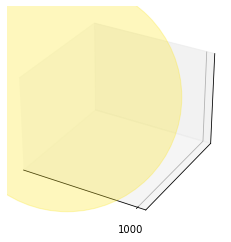

In [17]:
p= int(input('그래프의 x,y축 크기를 결정하세요'))
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d') #3 차원
ax.scatter(locationx,locationy,locationz, c=mass, s= radius) #초기 물체들의 위치 c는 색깔, s점의 크기

ax.set_zticks((-p,p))
ax.set_xticks((-p,p))
ax.set_yticks((-p,p))
plt.show()

In [18]:
len(locationx)

2

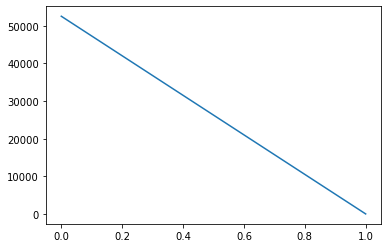

In [19]:
plt.plot(radius)

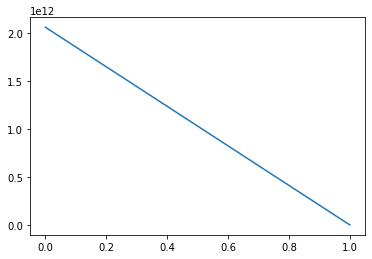

In [20]:
plt.plot(mass)

# 반복문 만들기

In [21]:
largest_radius=[]
largest_velocityx=[]
largest_velocityy=[]
largest_velocityz=[]
for repeat in range(1,REPEAT+1):
    
        
    """가속도x 성분 정의 해주기"""
    for a_ in range(1,count+1):
        for a_1 in range(1,count+1):
            if a_ in minus:
                continue
            if a_1 in minus:
                continue
            if a_== a_1:
                continue
            #a_가 먼저, a_1가 나중
            a__2= globals()['mass{}'.format(a_1)]
            a__3= globals()['r{}_{}'.format(a_,a_1)] # 거리
            a__4= globals()['locationx{}'.format(a_)] # 1의 x좌표
            a__5= globals()['locationx{}'.format(a_1)] #2의 x좌표
        
            globals()['ax{}_{}'.format(a_,a_1)]=A_(a__2,a__3,a__4,a__5)
           
    """가속도y 성분 정의 해주기"""
    for ay_ in range(1,count+1):
        for ay_1 in range(1,count+1):
            if ay_ in minus:
                continue
            if ay_1 in minus:
                continue
            if ay_==ay_1:
                continue
            ay__2= globals()['mass{}'.format(ay_1)]
            ay__3= globals()['r{}_{}'.format(ay_,ay_1)] # 거리
            ay__4= globals()['locationy{}'.format(ay_)] # 1의 y좌표
            ay__5= globals()['locationy{}'.format(ay_1)] #2의 y좌표
        
            globals()['ay{}_{}'.format(ay_,ay_1)]=A_(ay__2,ay__3,ay__4,ay__5)
            
    """가속도 Z 성분 정의 해주기"""
    for az_ in range(1,count+1):
        for az_1 in range(1,count+1):
            if az_ in minus:
                continue
            if az_1 in minus:
                continue
            if az_==az_1:
                continue
            az__2= globals()['mass{}'.format(az_1)]
            az__3= globals()['r{}_{}'.format(az_,az_1)] # 거리
            az__4= globals()['locationz{}'.format(az_)] # 1의 y좌표
            az__5= globals()['locationz{}'.format(az_1)] #2의 y좌표
        
            globals()['az{}_{}'.format(az_,az_1)]=A_(az__2,az__3,az__4,az__5)
    
    """가속도 x성분 총합 구하기"""
    #x성분
    for SAX1_ in range(1,count+1):
        for SAX2_ in range(1,count+1):
            if SAX1_ in minus:
                continue
            if SAX2_ in minus:
                continue
            if SAX1_==SAX2_:
                continue
            globals()['Sax{}'.format(SAX1_)]=sum(globals()['ax{}_{}'.format(SAX1_, SAX2_)])

    """가속도 y 성분 총합 구하기"""
    #y 성분
    for SAY1_ in range(1,count+1):
        for SAY2_ in range(1, count+1):
            if SAY1_ in minus:
                continue
            if SAY2_ in minus:
                continue
            if SAY1_==SAY2_:
                continue
            globals()['Say{}'.format(SAY1_)]=sum(globals()['ay{}_{}'.format(SAY1_,SAY2_)])
    
    """가속도 z 성분 총합 구하기"""
    # z 성분
    for SAZ in range(1, count+1):
        for SAZ2 in range(1, count+1):
            if SAZ in minus:
                continue
            if SAZ2 in minus:
                continue
            if SAZ==SAZ2:
                continue
            globals()['Saz{}'.format(SAZ)]= sum(globals()['az{}_{}'.format(SAZ,SAZ2)])
    
    """나중 속도 구하기"""
    #나중 속도 구하기 x 성분
    for vx1_ in range(1,count+1): 
        if vx1_ in minus:
            continue
        globals()['vx0{}'.format(vx1_)]=globals()['vx{}'.format(vx1_)]
        globals()['vx{}'.format(vx1_)]=V_(globals()['vx{}'.format(vx1_)],globals()['Sax{}'.format(vx1_)]) #처음속도와 가속도 합
    # V_라는 함수에 속도를 집어 넣음
    #vx는 나중 속도, vx0는 처음 속도 --> 서로 다른 거 확인 함
    
    #나중 속도 구하기 y 성분
    for vy1_ in range(1,count+1): 
        if vy1_ in minus:
            continue
        globals()['vy0{}'.format(vy1_)]=globals()['vy{}'.format(vy1_)]
        globals()['vy{}'.format(vy1_)]=V_(globals()['vy{}'.format(vy1_)],globals()['Say{}'.format(vy1_)]) #처음속도와 가속도 합
    # V_라는 함수에 속도를 집어 넣음 이렇게 해서 vx,vy 갱신
    #vy는 나중 속도, vy0는 처음 속도 --> 서로 다른 거 확인 함
    
    #나중 속도 구하기 z 성분
    for vz1_ in range(1,count+1): 
        if vz1_ in minus:
            continue
        globals()['vz0{}'.format(vz1_)]=globals()['vz{}'.format(vz1_)]
        globals()['vz{}'.format(vz1_)]=V_(globals()['vz{}'.format(vz1_)],globals()['Saz{}'.format(vz1_)]) #처음속도와 가속도 합
    # V_라는 함수에 속도를 집어 넣음 이렇게 해서 vx,vy,vz 갱신
        
    
    """나중 위치 구하기"""
    # 나중 위치 구하기 x 성분
    for LX1_ in range(1,count+1):
        if LX1_ in minus:
            continue
        globals()['locationx{}'.format(LX1_)]= L_(globals()['vx0{}'.format(LX1_)], globals()['vx{}'.format(LX1_)], globals()['locationx{}'.format(LX1_)])
    #처음 속도, 나중 속도
 
    # 나중 위치 구하기 y 성분
    for LY1_ in range(1,count+1):
        if LY1_ in minus:
            continue
        globals()['locationy{}'.format(LY1_)]= L_(globals()['vy0{}'.format(LY1_)], globals()['vy{}'.format(LY1_)], globals()['locationy{}'.format(LY1_)])
    #처음 속도, 나중 속도
    # 나중 위치 구하기 z 성분
    for Lz1_ in range(1,count+1):
        if Lz1_ in minus:
            continue
        globals()['locationz{}'.format(Lz1_)]= L_(globals()['vz0{}'.format(Lz1_)], globals()['vz{}'.format(Lz1_)], globals()['locationz{}'.format(Lz1_)])
    #처음 속도, 나중 속도
    
    
    
    """삭제 코드 작성"""
    # 이곳에서부터 물체 삭제 코드 작성 시작
    for DD in range(1,count+1):
        for DDD in range(1,count+1):
            if DD in minus:
                continue
            if DDD in minus:
                continue
            if DD<DDD and globals()['r__{}_{}'.format(DD,DDD)]<=0:
                globals()['rad{}'.format(DD)]= area(globals()['rad{}'.format(DD)],globals()['rad{}'.format(DDD)])
                # 앞의 물체(DD)반지름 갱신
                # else 생략 가능!!
                #mass{} 앞의 물체 질량갱신
                globals()['mass{}'.format(DD)]=sum(globals()['mass{}'.format(DD)],globals()['mass{}'.format(DDD)])
                
                del globals()['locationx{}'.format(DDD)], #큰 걸 지워야 해 DDD
                del globals()['locationy{}'.format(DDD)],
                del globals()['locationz{}'.format(DDD)]
                    # 초기 속도 삭제
                del globals()['vx0{}'.format(DDD)],
                del globals()['vy0{}'.format(DDD)],
                del globals()['vz0{}'.format(DDD)]
                    #속도 삭제
                del  globals()['vx{}'.format(DDD)],
                del  globals()['vy{}'.format(DDD)],
                del  globals()['vz{}'.format(DDD)]
                    #큰 거 기준 (질점,지표면)부터 거리 삭제
                del globals()['r{}_{}'.format(DDD,DD)],
                del globals()['r__{}_{}'.format(DDD,DD)],
                    #큰 거 반지름 삭제
                del globals()['rad{}'.format(DDD)],
                    #큰 거 질량 삭제
                del globals()['mass{}'.format(DDD)]
                    #큰 거 가속도 삭제
                del globals()['ax{}_{}'.format(DDD,DD)]
                del globals()['ay{}_{}'.format(DDD,DD)]
                del globals()['az{}_{}'.format(DDD,DD)]
                del globals()['Sax{}'.format(DDD)]
                del globals()['Say{}'.format(DDD)]
                del globals()['Saz{}'.format(DDD)]
                #물체들이 삭제되었으니 물체들의 총 수도 다시 정의해야 한다.
                
                """!매우 중요!"""
                minus.append(locals()['DDD'])
    
    
    """리스트 초기화 작업"""
    #기존 locationx리스트 초기화
    locationx=[]
    locationy=[]
    locationz=[]
    for LOCATION1 in range(1,count+1):
        if LOCATION1 in minus:
            continue
        locationx.append(globals()['locationx{}'.format(LOCATION1)]) #이렇게 append내에서도 광역 변수를 넣어줘야 정상적으로 숫자가 나온다
        locationy.append(globals()['locationy{}'.format(LOCATION1)])
        locationz.append(globals()['locationz{}'.format(LOCATION1)])
        
    #기존 질량 리스트 초기화
    mass=[]
    for MASS_ in range(1,count+1):
        if MASS_ in minus:
            continue
        mass.append(globals()['mass{}'.format(MASS_)])
    
    # 기존 반지름 리스트 초기화
    radius=[]
    for R____ in range(1,count+1):
        if R____ in minus:
            continue
        radius.append(globals()['rad{}'.format(R____)])
    # 긱존 속도 리스트 초기화
    velocityx=[]
    velocityy=[]
    velocityz=[]
    for i in range(1,count+1):
        if i in minus:
            continue
        velocityz.append(globals()['vz{}'.format(i)])
        velocityx.append(globals()['vx{}'.format(i)])
        velocityy.append(globals()['vy{}'.format(i)])
    
    """최댓값 찾기 시리즈!!"""
    largest= radius[0]
    for i in radius: #flist
        if i > largest:
            largest=i
    largest_radius.append(largest)
    
    largest1=velocityx[0]
    for i in velocityx:
        if i > largest1:
            largest1=i
    largest_velocityx.append(largest1)
    
    largest2=velocityy[0]
    for i in velocityy:
        if i > largest2:
            largest2=i
    largest_velocityy.append(largest2)
    
    largest3= velocityz[0]
    for i in velocityz:
        if i> largest3:
            largest3=i
    largest_velocityz.append(largest3)
    
           
    #그래프 그리기
    ax.scatter(locationx,locationy,locationz, c=mass, s= radius) #초기 물체들의 위치 c는 색깔, s점의 크기
    ax.set_zticks((-p,p))
    ax.set_xticks((-p,p))
    ax.set_yticks((-p,p))
    plt.pause(0.0001)
    

plt.show()

KeyboardInterrupt: 

In [ ]:
plt.show()

In [ ]:
len(locationx)

In [ ]:
print(minus)

In [ ]:
len(minus)

In [ ]:
plt.plot(radius)
plt.show

In [ ]:
plt.plot(largest_radius)
plt.show